# Feature Scaling
## Standardization & Normanization
https://www.datacamp.com/tutorial/normalization-vs-standardization

In [4]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo,list_available_datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
ds = fetch_ucirepo(id=186) 
df=ds.data.features.join(ds.data.targets)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


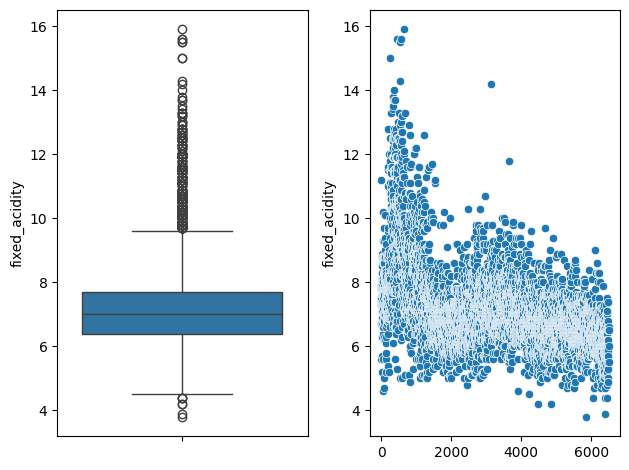

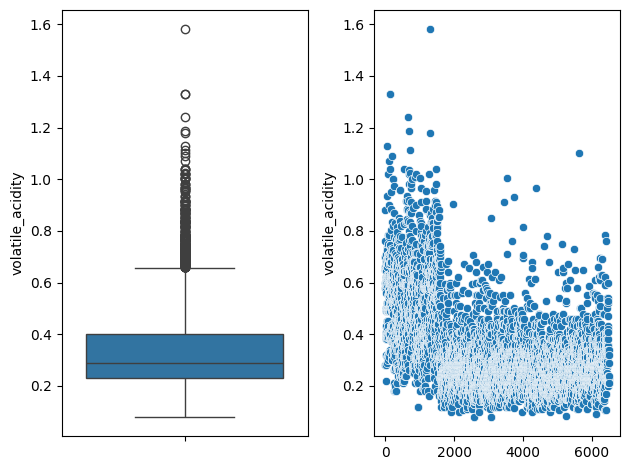

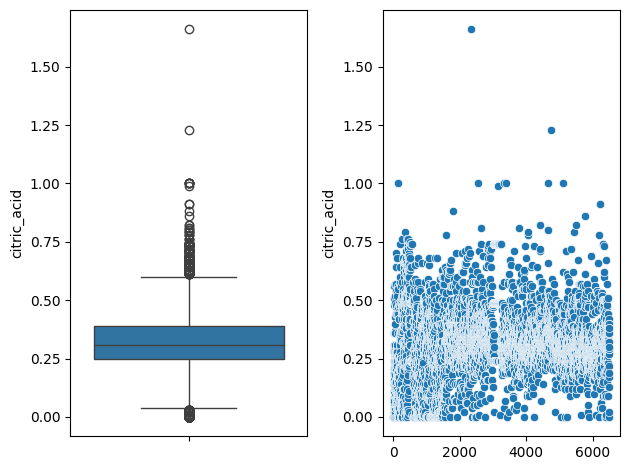

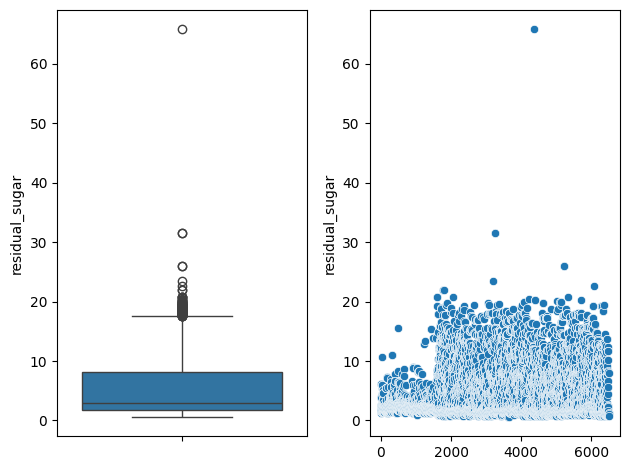

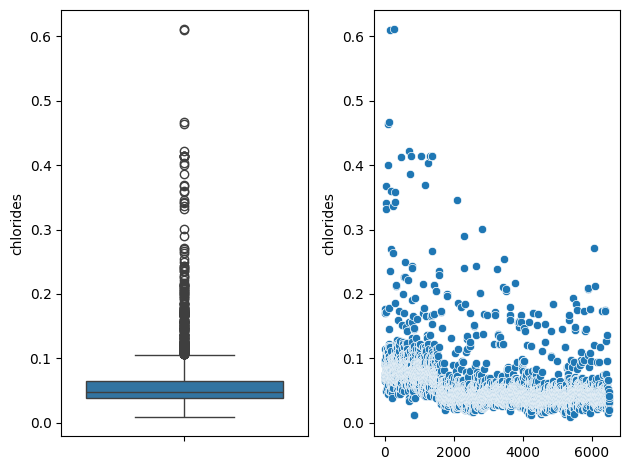

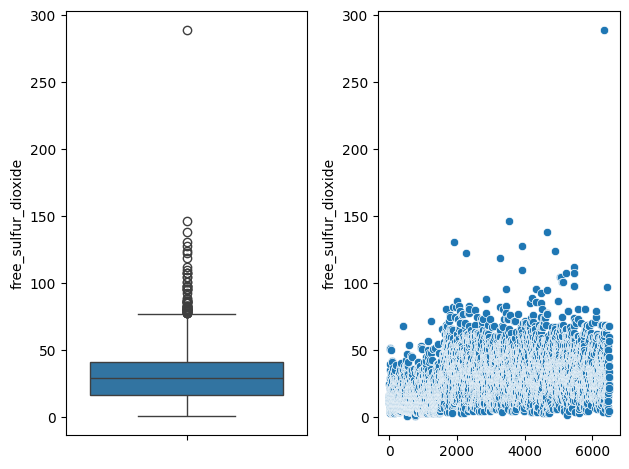

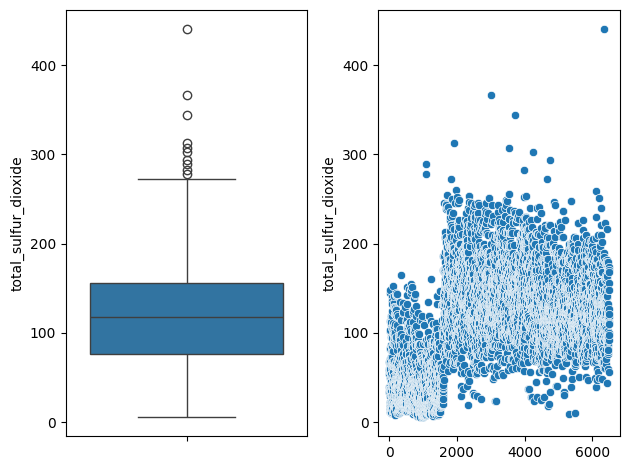

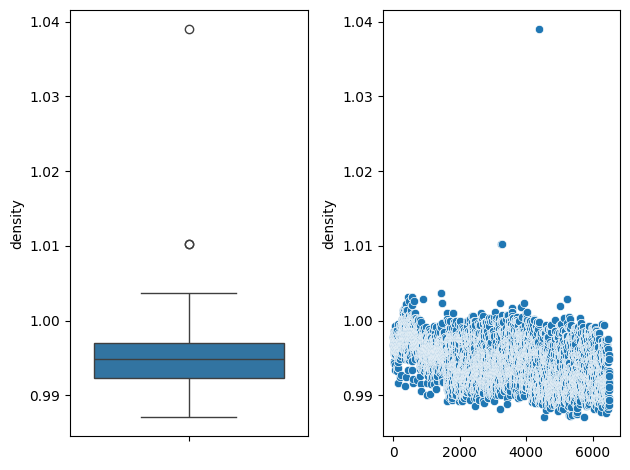

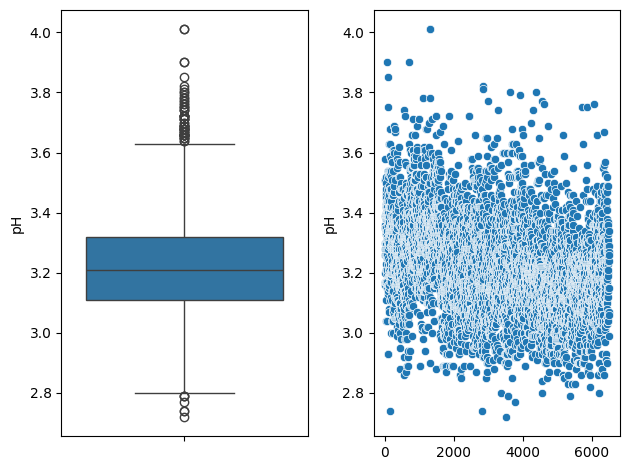

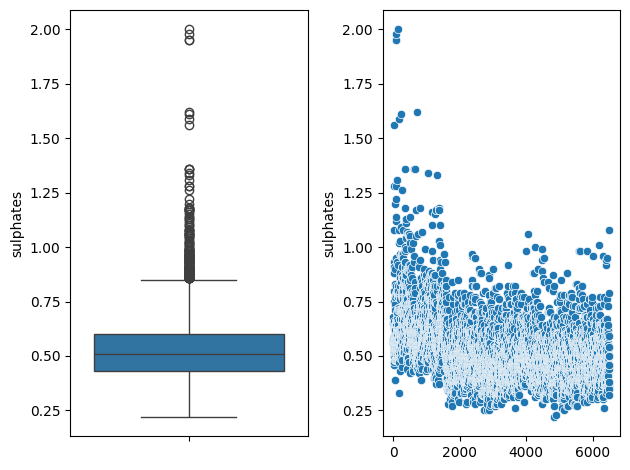

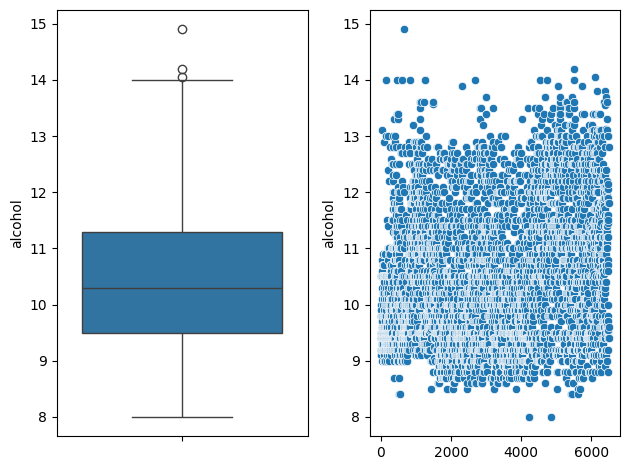

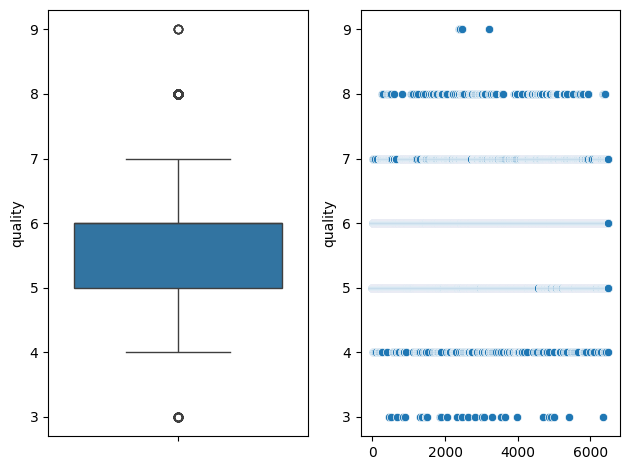

In [7]:

def outlier_plot(data:pd.DataFrame):
    plot_row=1
    plot_index=0
    for key in data.keys():
        plt.subplot(plot_row,2,1) # 1 row, 2 columns, first plot
        sns.boxplot(data[key])
        
        # plt.subplot(plot_row,2,2) # 1 row, 2 columns, first plot
        # sns.violinplot(data[key])
            
        plt.subplot(plot_row,2,2) # 1 row, 2 columns, second plot
        sns.scatterplot(data[key])
        
        plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
        plt.show()
        
    
outlier_plot(df)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_cols=[col for col in df.columns if col!='quality']
df_scaled = pd.DataFrame(scaler.fit_transform(df[feature_cols]), columns=feature_cols)
df_scaled.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


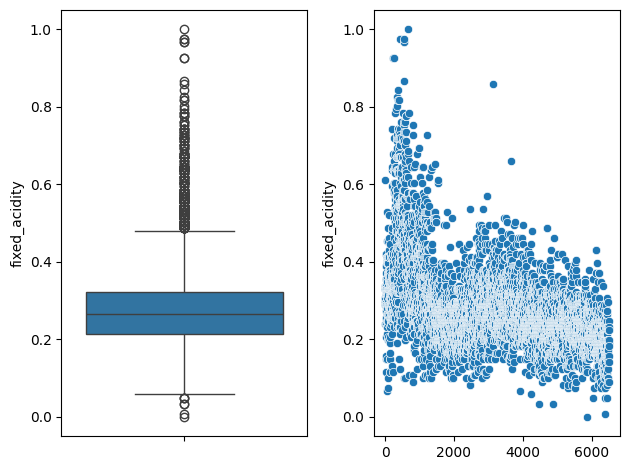

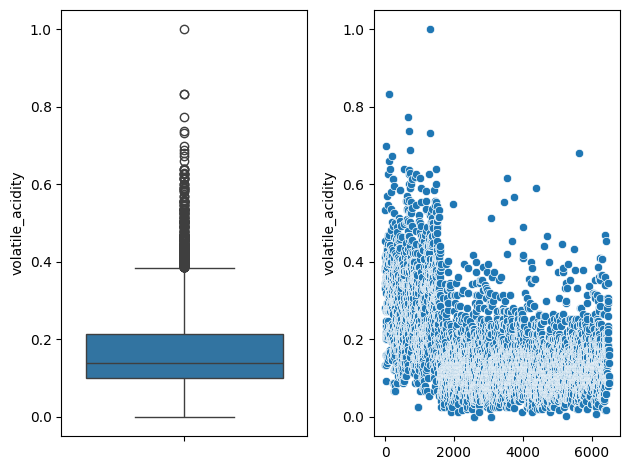

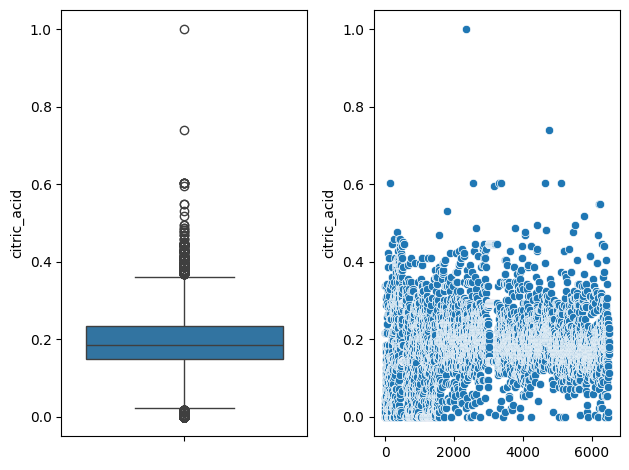

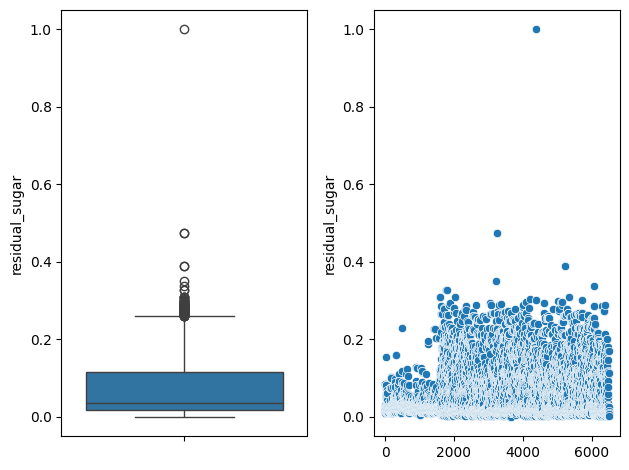

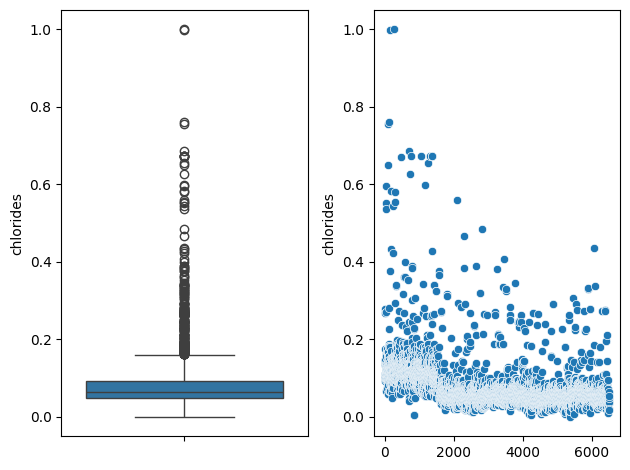

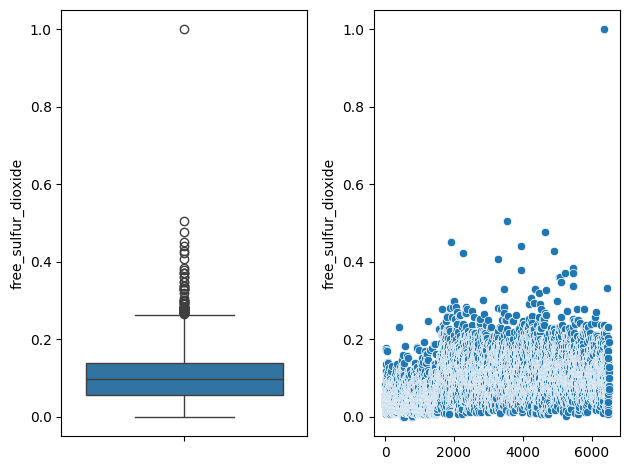

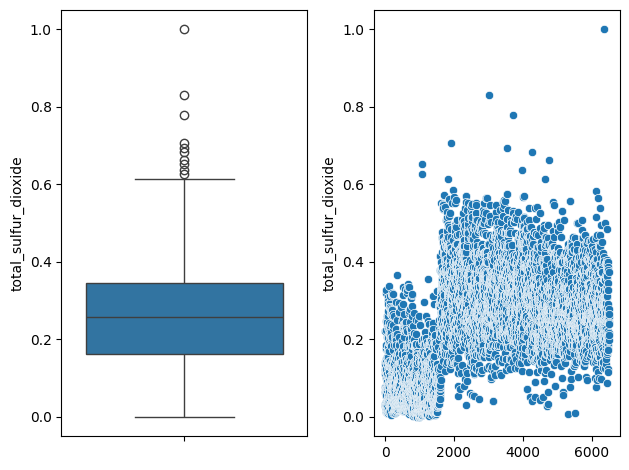

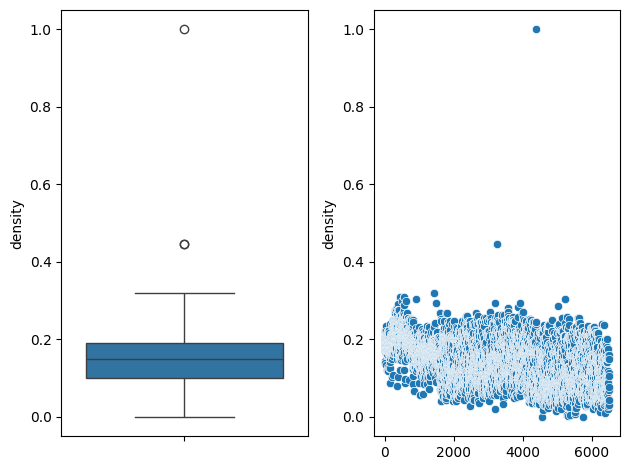

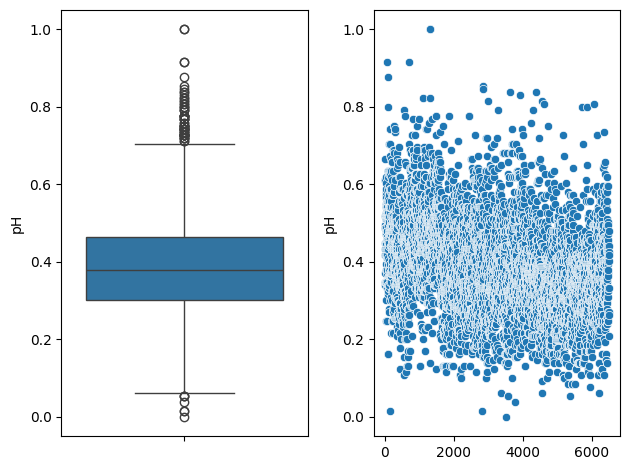

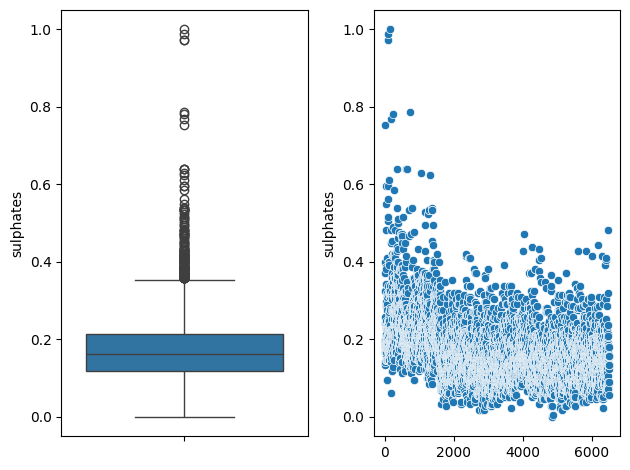

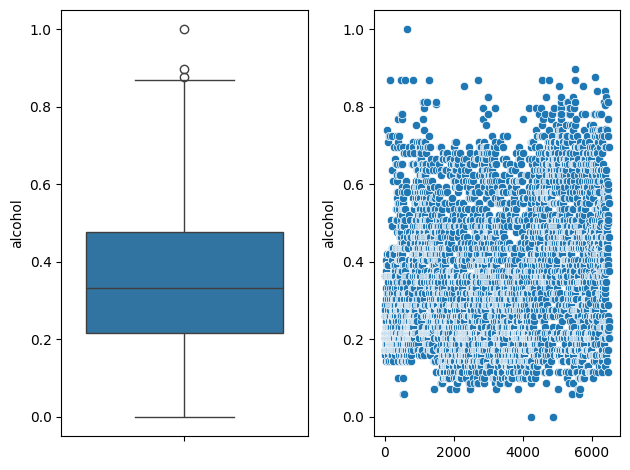

In [9]:
outlier_plot(df_scaled)

In [12]:
for key in df_scaled.keys():
    df_scaled[key]=np.log1p(df_scaled[key])
df_scaled.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.217522,0.141836,0.157553,0.065375,0.070454,0.090533,0.195019,0.125872,0.277420,0.145725,0.258246
std,0.061409,0.073726,0.062479,0.059166,0.041737,0.049042,0.087693,0.044214,0.067661,0.056922,0.094584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.177847,0.091038,0.131279,0.018073,0.045975,0.052656,0.141078,0.091725,0.234401,0.105730,0.179576
50%,0.210785,0.123127,0.158042,0.035510,0.059410,0.088726,0.206668,0.130812,0.279124,0.140575,0.252844
75%,0.246378,0.176782,0.191465,0.103352,0.085212,0.122265,0.259943,0.160718,0.323484,0.176886,0.329927
max,0.526589,0.526589,0.526589,0.526589,0.526589,0.526589,0.526589,0.526589,0.526589,0.526589,0.526589


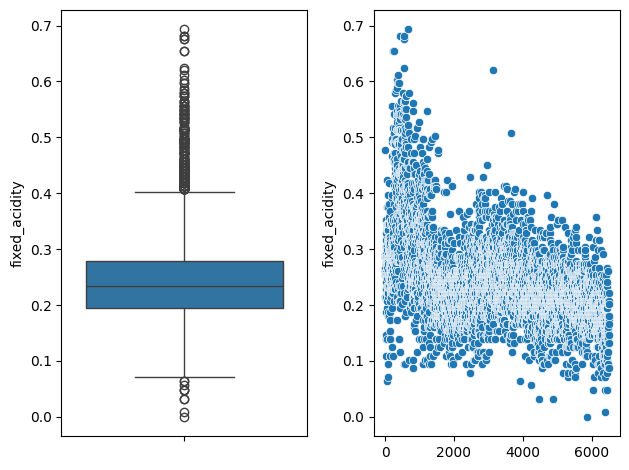

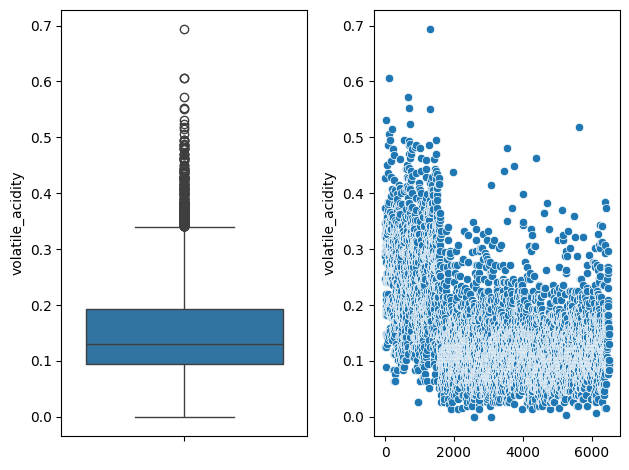

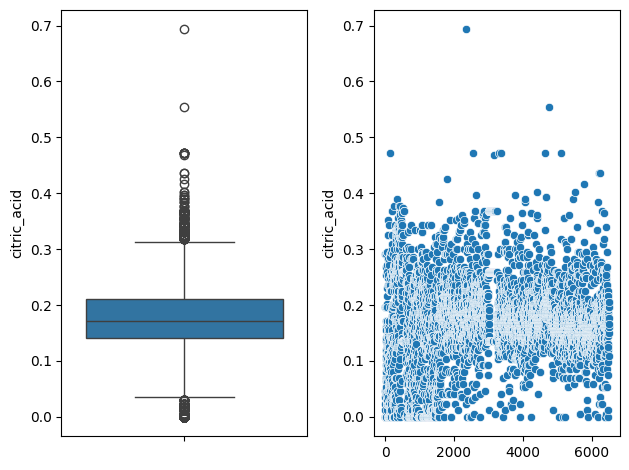

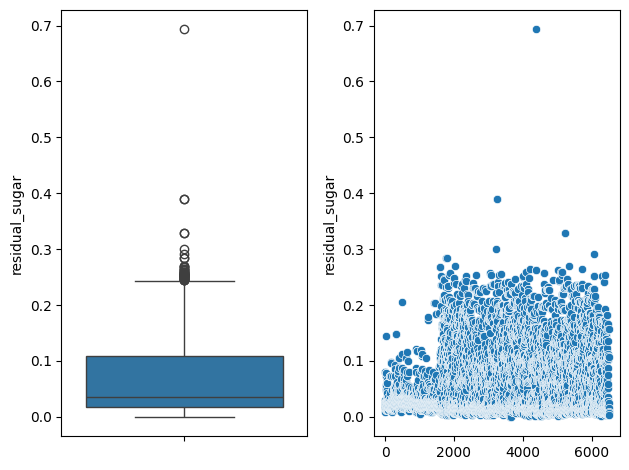

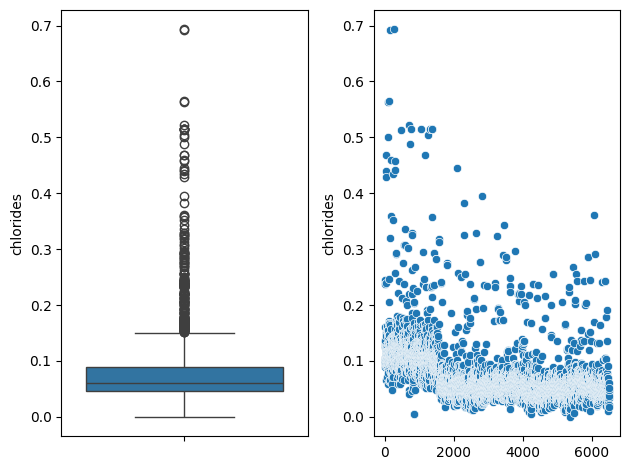

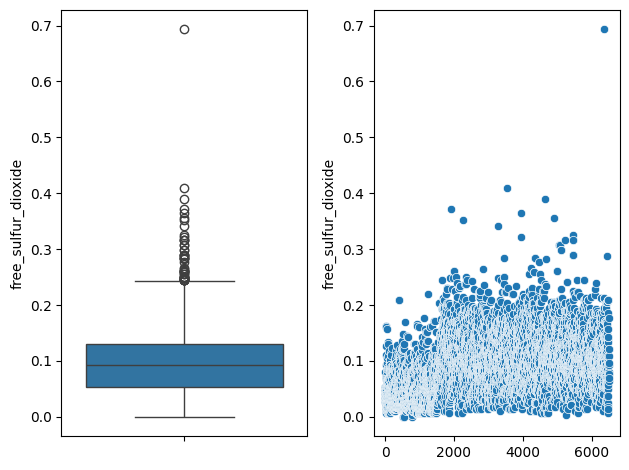

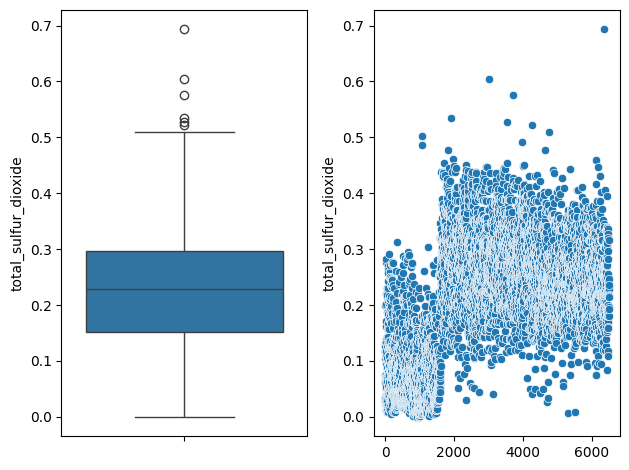

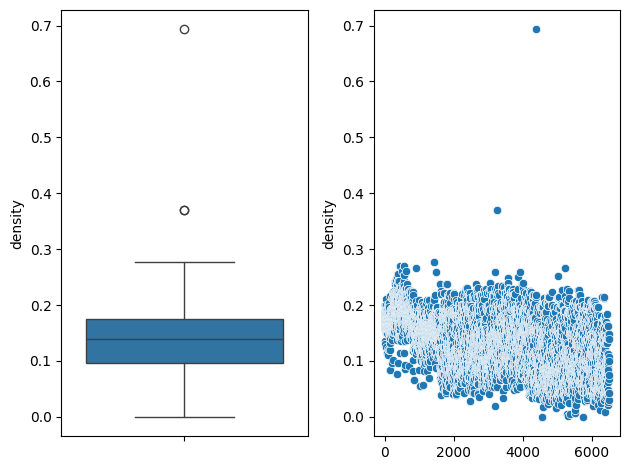

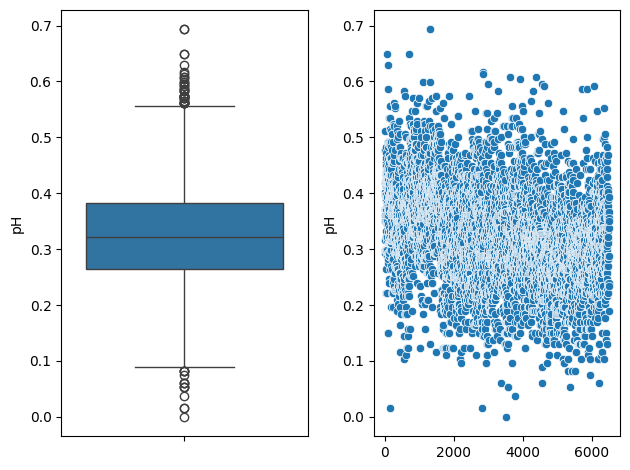

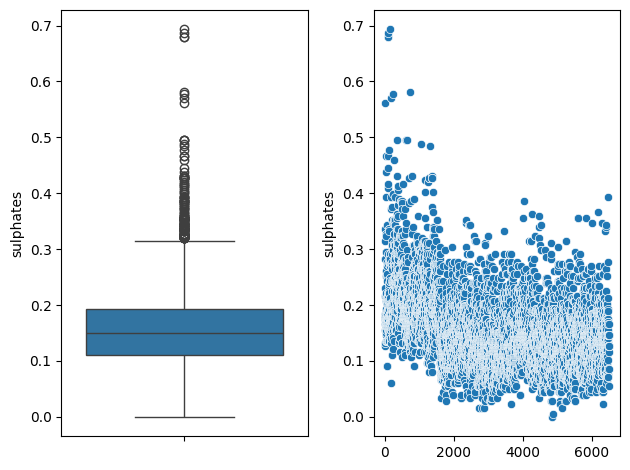

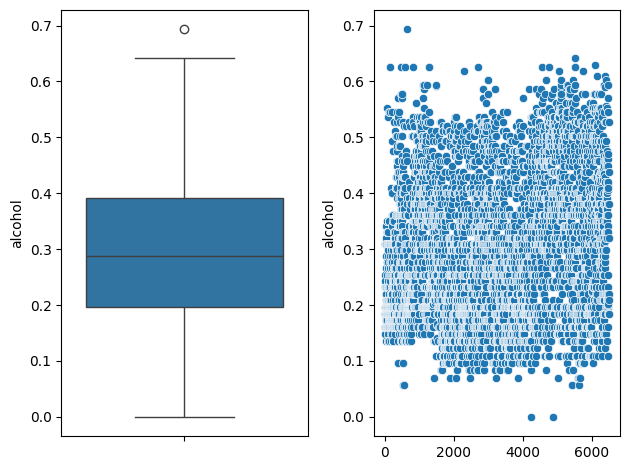

In [11]:
outlier_plot(df_scaled)